In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


## Import Data

In [2]:
os.getenv('PUI2016')

'/home/cusp/lag552/PUI2016'

In [3]:
!curl -O 'https://s3.amazonaws.com/tripdata/201512-citibike-tripdata.zip'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.0M  100 22.0M    0     0  7707k      0  0:00:02  0:00:02 --:--:-- 8168k


In [4]:
!unzip 201512-citibike-tripdata.zip

In [5]:
citi_bike = pd.read_csv('201512-citibike-tripdata.csv')
citi_bike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


## Data Wrangling - Change Birth Year to Age

In [6]:
citi_bike.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [7]:
citi_bike.head()

,birth year
0,1983.0
1,1975.0
2,1966.0
3,1985.0
4,1968.0


In [8]:
citi_bike_adj = citi_bike['birth year'] > 1920
citi_bike[citi_bike_adj].dropna().values

array([[ 1983.],
       [ 1975.],
       [ 1966.],
       ..., 
       [ 1959.],
       [ 1987.],
       [ 1968.]])

In [9]:
age_cb = (2016 - citi_bike[citi_bike_adj].dropna().values).flatten()
age_cb

array([ 33.,  41.,  50., ...,  57.,  29.,  48.])

## Statistical Tests - Testing at the Normal Distribution

### Hypothesis Statements

**K-S Test and Anderson-Darling Test**

Null Hypothesis: The age distribution of citibike drivers fits a gaussian model N($\mu$, $\sigma$), or normal, distribution, alpha = 0.05.

Alternative Hypothesis: The age distribution of citibike drivers does not fit a normal distribution.

In [10]:
mean_cb = np.mean(age_cb)
mean_cb

39.685962058736806

In [11]:
std_cb = np.std(age_cb)
std_cb, mean_cb

(11.71267746390131, 39.685962058736806)

In [12]:
scipy.stats.kstest(age_cb, 'norm', args = (mean_cb, std_cb))

KstestResult(statistic=0.10015011582540717, pvalue=0.0)

In [13]:
scipy.stats.anderson(age_cb, 'norm')

AndersonResult(statistic=9282.8116374734091, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [14]:
len(age_cb)

735927

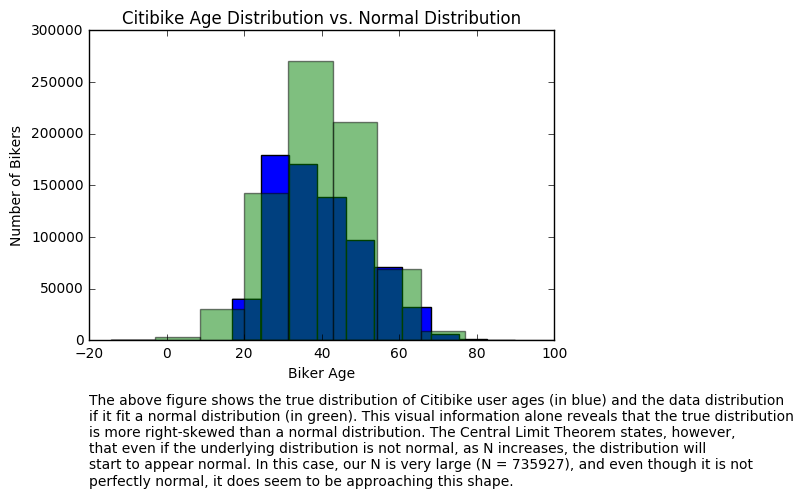

In [15]:
pl.hist(age_cb)
pl.hist(scipy.stats.norm.rvs(loc=mean_cb, scale=std_cb, size=len(age_cb)), alpha=0.5)
pl.title("Citibike Age Distribution vs. Normal Distribution")
pl.xlabel("Biker Age")
pl.ylabel("Number of Bikers")
pl.text(-20, -140000, "The above figure shows the true distribution of Citibike user ages (in blue) and the data distribution \nif it fit a normal distribution (in green). This visual information alone reveals that the true distribution \nis more right-skewed than a normal distribution. The Central Limit Theorem states, however, \nthat even if the underlying distribution is not normal, as N increases, the distribution will \nstart to appear normal. In this case, our N is very large (N = 735927), and even though it is not \nperfectly normal, it does seem to be approaching this shape.")

### Conclusions

From the K-S test, we obtain a p-value of 0.0; from the A-D test, we obtain test statistic, A, of 9282.8, which is greater the critical value of 0.787 at a significance level of 5% (indeed, it is larger than the critical values at all provided significant levels). Therefore, we can reject the null hypothesis and conclude that the age distribution of citibike drivers does **not** fit a normal distribution.

## Statistical Tests - Testing at the Logistic Distribution

### Hypothesis Statements

**K-S Test and Anderson-Darling Test**

Null Hypothesis: The age distribution of citibike drivers fits a logistic distribution, alpha = 0.05.

Alternative Hypothesis: The age distribution of citibike drivers does not fit a logistic distribution.

In [16]:
scipy.stats.kstest(age_cb, 'logistic', args = (mean_cb, std_cb))

KstestResult(statistic=0.17178814702188078, pvalue=0.0)

In [17]:
scipy.stats.anderson(age_cb, 'logistic')

AndersonResult(statistic=9147.2584469988942, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

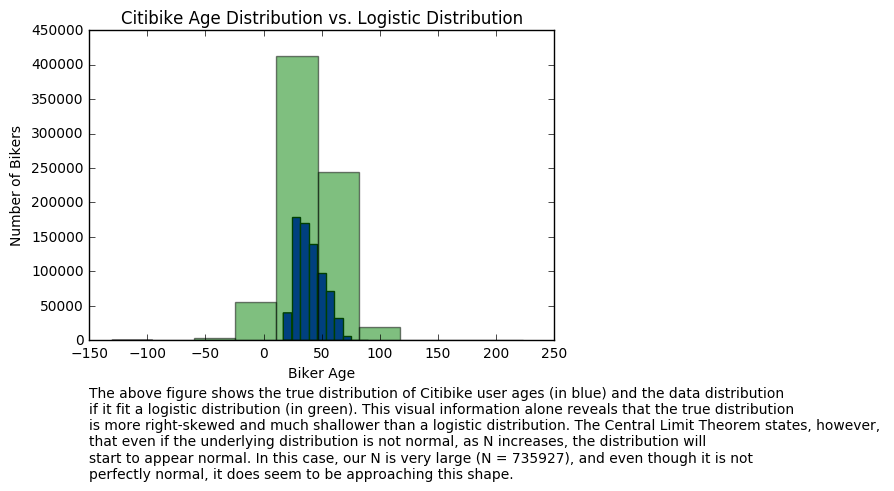

In [18]:
pl.hist(age_cb)
pl.hist(scipy.stats.logistic.rvs(loc=mean_cb, scale=std_cb, size=len(age_cb)),alpha=0.5)
pl.title("Citibike Age Distribution vs. Logistic Distribution")
pl.xlabel("Biker Age")
pl.ylabel("Number of Bikers")
pl.text(-150, -200000, "The above figure shows the true distribution of Citibike user ages (in blue) and the data distribution \nif it fit a logistic distribution (in green). This visual information alone reveals that the true distribution \nis more right-skewed and much shallower than a logistic distribution. The Central Limit Theorem states, however, \nthat even if the underlying distribution is not normal, as N increases, the distribution will \nstart to appear normal. In this case, our N is very large (N = 735927), and even though it is not \nperfectly normal, it does seem to be approaching this shape.") 

### Conclusions

From the K-S test, we obtain a p-value of 0.0; from the A-D test, we obtain test statistic, A, of 9147.3, which is greater the critical value of 0.66 at a significance level of 5% (indeed, it is larger than the critical values at all provided significant levels). Therefore, we can reject the null hypothesis and conclude that the age distribution of citibike drivers does **not** fit a logistic distribution.